<a href="https://colab.research.google.com/github/KARINAgoncalvesSOARES/Analise_de_dados_EmissaoDeCO2_DeCarros/blob/main/CO2_emission_of_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Análise de Dados da Emissão de CO2 de Carros</h2>

Data Scientst Jr.: Karina Gonçalves Soares

Link de estudo:
* [Kaggle: Análise de emissão de co2](https://www.kaggle.com/code/lekeoguntoyinbo/co2-emission-of-cars-data-analysis/notebook)

# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Importando Dataset

In [2]:
co2_df = pd.read_csv('/content/drive/MyDrive/eddy/DATA.csv')

co2_df.head()

import warnings
warnings.filterwarnings("ignore")

In [3]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


In [4]:
#Determinando os 15 carros com a maior emissão de co2

a = co2_df.sort_values(by="CO2", ascending=False)
a.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
35,Mercedes,SLK,2500,1395,120,NaN
31,Volvo,XC70,2000,1746,117,NaN
30,Mercedes,E-Class,2100,1605,115,NaN
29,BMW,5,2000,1705,114,NaN
27,Audi,A6,2000,1725,114,NaN


In [5]:
#Determinando os 15 carros com a maior emissão de co2

a = co2_df.sort_values(by="CO2", ascending=False)
b = a.reset_index(drop=False)
bb = b.drop(columns =["Unnamed: 5"])
co2_df1 = bb[:]
co2_df1.head()

,index,Car,Model,Volume,Weight,CO2
0,35,Mercedes,SLK,2500,1395,120
1,31,Volvo,XC70,2000,1746,117
2,30,Mercedes,E-Class,2100,1605,115
3,29,BMW,5,2000,1705,114
4,27,Audi,A6,2000,1725,114


In [6]:
co2_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   36 non-null     int64 
 1   Car     36 non-null     object
 2   Model   36 non-null     object
 3   Volume  36 non-null     int64 
 4   Weight  36 non-null     int64 
 5   CO2     36 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.8+ KB


In [7]:
# Dados de limpeza para plotagem
# https://signalfix.net/pt-pt/pandas-combinam-duas-colunas-de-texto-no-dataframe

co2_df1["brand_model"] = co2_df1["Car"] + " " + co2_df1["Model"]
co2_df1.head()

,index,Car,Model,Volume,Weight,CO2,brand_model
0,35,Mercedes,SLK,2500,1395,120,Mercedes SLK
1,31,Volvo,XC70,2000,1746,117,Volvo XC70
2,30,Mercedes,E-Class,2100,1605,115,Mercedes E-Class
3,29,BMW,5,2000,1705,114,BMW 5
4,27,Audi,A6,2000,1725,114,Audi A6


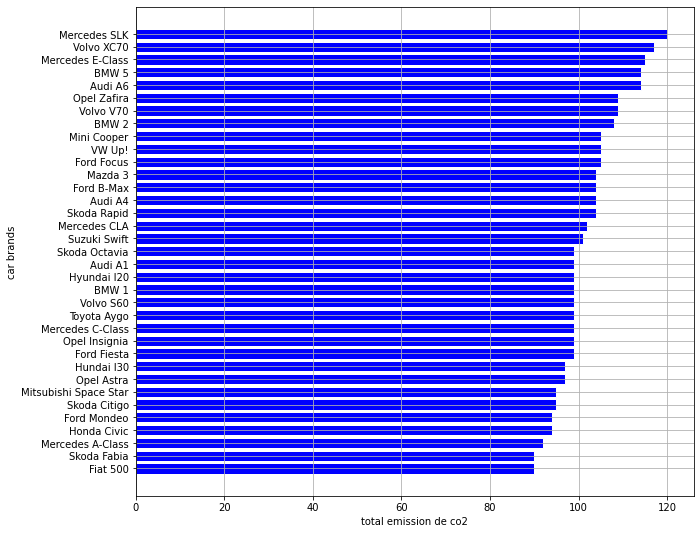

In [8]:
# Gráfico de barras
fig = plt.figure(figsize = (10,9))

x = co2_df1["brand_model"].to_list()
y = co2_df1["CO2"].to_list()

x.reverse()
y.reverse()
plt.barh(x,y,color = "blue", edgecolor="white")
plt.ylabel("car brands")
plt.xlabel("total emission de co2")
plt.grid(True)
plt.show()

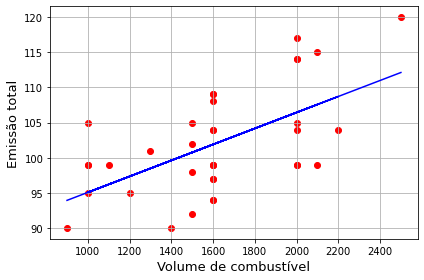

In [42]:
# Determinar a correlação entre o peso do volume de combustível e as emissões
#fig = plt.figure(figsize = (10,9)) # Tamanho da figura
xx = co2_df1["Volume"]
yy = co2_df1["CO2"]
a, b = np.polyfit(xx,yy,1) #Método Numpy polyfit () é usado para ajustar nossos dados dentro de uma função polinomial

plt.scatter(xx,yy,marker="o",color = "red", edgecolor="red")
plt.plot(xx,a*xx+b,color="blue")

plt.xlabel("Volume de combustível", fontsize = 13)
plt.ylabel("Emissão total", fontsize = 13)
plt.tight_layout() 
plt.grid(True)
plt.show()